In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("SMSSpamCollection",sep="\t",names=["label","message"])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
Lb = LabelEncoder()

In [5]:
df.label = Lb.fit_transform(df.label)
# 0 - ham and 1 - spam

In [6]:
df.sample(5)

,label,message
1449,1,As a registered optin subscriber ur draw 4 £10...
5201,1,YOU VE WON! Your 4* Costa Del Sol Holiday or £...
3340,0,Babe !!!! I LOVE YOU !!!! *covers your face in...
131,0,I'm home.
795,0,There generally isn't one. It's an uncountable...


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates(keep="first")

In [10]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df.label.value_counts()

0    4516
1     653
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

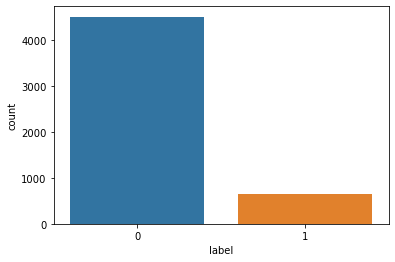

In [12]:
sns.countplot(x= df.label)

In [13]:
import nltk

In [14]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df["char_len"] = df["message"].apply(len)

<ipython-input-15-ba24ae95a95f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char_len"] = df["message"].apply(len)


In [16]:
df

,label,message,char_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [17]:
df["word_len"] = df.message.apply(lambda x : len(nltk.word_tokenize(x)))

<ipython-input-17-4494c95177fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_len"] = df.message.apply(lambda x : len(nltk.word_tokenize(x)))


In [18]:
df.head()

,label,message,char_len,word_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df["sen_len"] = df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))

<ipython-input-19-7e1771f8ae92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sen_len"] = df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))


In [20]:
df.head()

,label,message,char_len,word_len,sen_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[["char_len","word_len","sen_len"]].groupby(by=df["label"]).mean()

,char_len,word_len,sen_len
label,,,
0,70.905890,17.267272,1.822852
1,137.704441,27.762634,2.984686


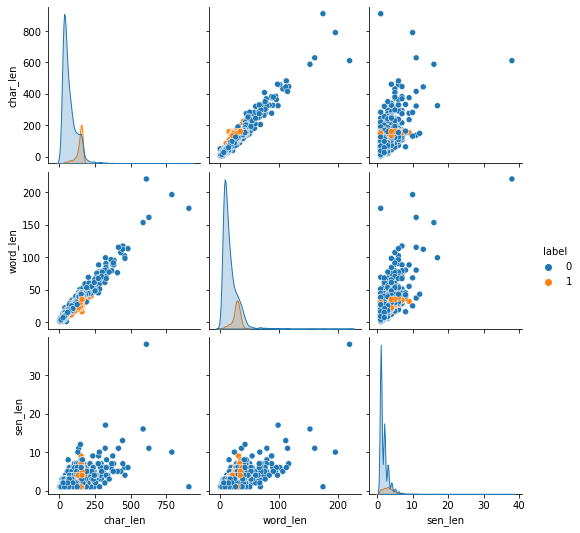

In [22]:
sns.pairplot(df,hue="label")

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
def clean_msg(msg) :
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    li1 = []
    for wd in msg :
        if wd.isalnum() :
            li1.append(wd)
    lis2=[]
    for wd in li1 :
        if wd not in stopwords.words("english") and string.punctuation :
            lis2.append(wd)
    li1 = []
    for wd in lis2 :
        li1.append(ps.stem(wd))
    return " ".join(li1)

In [27]:
clean_msg("NIce To Meet You! i Loved you still_num,to,talk abou! hi 20... %% ")

'nice meet love talk abou hi 20'

In [28]:
clean_msg(df["message"][2])

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [29]:
df["clear_msg"] = df.message.apply(clean_msg)

<ipython-input-29-d6a469412f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clear_msg"] = df.message.apply(clean_msg)


In [30]:
df

,label,message,char_len,word_len,sen_len,clear_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [31]:
from wordcloud import WordCloud

In [32]:
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

In [33]:
fre_wd = wc.generate(df.clear_msg.str.cat(sep=" "))

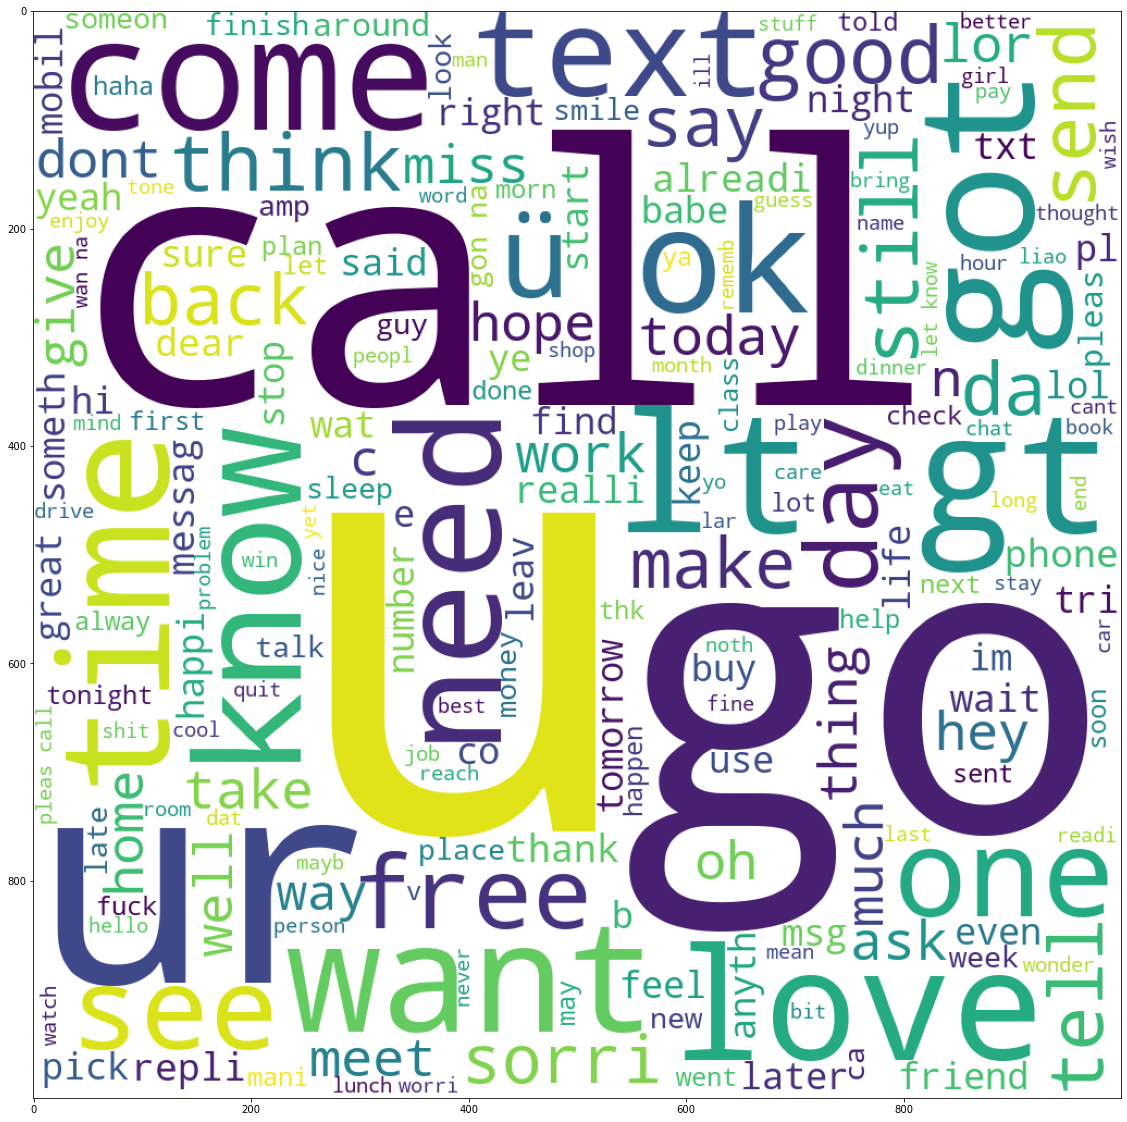

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(fre_wd)

In [35]:
tot_ham_list=[]
for msg in df[df.label == 1]["clear_msg"].tolist() :
    for wd in msg.split() :
        tot_ham_list.append(wd)

In [36]:
len(tot_ham_list)

9982

In [37]:
from collections import Counter

In [38]:
Counter(tot_ham_list).most_common(20)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57)]

In [39]:
ddf = pd.DataFrame(Counter(tot_ham_list).most_common(20))
ddf

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [41]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [42]:
x_cv = cv.fit_transform(df.clear_msg).toarray()
x_tfidf = tfidf.fit_transform(df.clear_msg).toarray()

In [43]:
x_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
x_cv.shape

(5169, 6782)

In [44]:
y = df.label.values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
x_cv_train,x_cv_test,y_cv_train,y_cv_test = train_test_split(x_cv,y,test_size=0.2)
x_tfidf_train,x_tfidf_test,y_tfidf_train,y_tfidf_test = train_test_split(x_tfidf,y,test_size=0.2)

In [47]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [48]:
Mnb = MultinomialNB()
Gnb = GaussianNB()
Bnb = BernoulliNB()

In [49]:
Mnb.fit(x_cv_train,y_cv_train)
pred_cv = Mnb.predict(x_cv_test)
print(metrics.confusion_matrix(y_cv_test,pred_cv))
print(metrics.accuracy_score(y_cv_test,pred_cv))
print(metrics.precision_score(y_cv_test,pred_cv))

[[894  13]
 [ 13 114]]
0.9748549323017408
0.8976377952755905


In [50]:
Gnb.fit(x_cv_train,y_cv_train)
pred_cv = Gnb.predict(x_cv_test)
print(metrics.confusion_matrix(y_cv_test,pred_cv))
print(metrics.accuracy_score(y_cv_test,pred_cv))
print(metrics.precision_score(y_cv_test,pred_cv))

[[783 124]
 [ 21 106]]
0.8597678916827853
0.4608695652173913


In [51]:
Bnb.fit(x_cv_train,y_cv_train)
pred_cv = Bnb.predict(x_cv_test)
print(metrics.confusion_matrix(y_cv_test,pred_cv))
print(metrics.accuracy_score(y_cv_test,pred_cv))
print(metrics.precision_score(y_cv_test,pred_cv))

[[902   5]
 [ 32  95]]
0.9642166344294004
0.95


In [52]:
Mnb.fit(x_tfidf_train,y_tfidf_train)
pred_tfidf = Mnb.predict(x_tfidf_test)
print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
print(metrics.precision_score(y_tfidf_test,pred_tfidf))

[[904   0]
 [ 51  79]]
0.9506769825918762
1.0


In [53]:
Gnb.fit(x_tfidf_train,y_tfidf_train)
pred_tfidf = Gnb.predict(x_tfidf_test)
print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
print(metrics.precision_score(y_tfidf_test,pred_tfidf))

[[794 110]
 [ 21 109]]
0.8733075435203095
0.4977168949771689


In [54]:
Bnb.fit(x_tfidf_train,y_tfidf_train)
pred_tfidf = Bnb.predict(x_tfidf_test)
print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
print(metrics.precision_score(y_tfidf_test,pred_tfidf))

[[900   4]
 [ 37  93]]
0.960348162475822
0.9587628865979382


In [66]:
import pickle
with open("clean_msg.pkl","wb") as f :
    pickle.dump(clean_msg,f)

In [67]:
with open("clean_msg.pkl","rb") as f1 :
    hi = pickle.load(f1)
#     print(hi("rakesh kumar hi hello how are you"))
    print(hi(df["message"][2]))

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18


In [60]:
#'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [64]:
with open("mat_num.pkl","wb") as f :
    pickle.dump(tfidf,f)

In [63]:
with open("model_spam_ham.pkl","wb") as f :
    pickle.dump(Mnb,f)

In [69]:
pred_tfidf = Mnb.predict(x_tfidf_test)
print(metrics.confusion_matrix(y_tfidf_test,pred_tfidf))
print(metrics.accuracy_score(y_tfidf_test,pred_tfidf))
print(metrics.precision_score(y_tfidf_test,pred_tfidf))

[[904   0]
 [ 51  79]]
0.9506769825918762
1.0


In [70]:
pred_tfidf

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
# Mnb.predict


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
df.head()

,label,message,char_len,word_len,sen_len,clear_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
